## Задача №3.
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

### Доп.требование: для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

In [23]:
# импорт библиотек 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

In [24]:
# Загрузка данных
df = pd.read_csv("HousingData.csv")  # Укажите корректный путь к файлу
# Вывод первых строк чтобы проверить структуру данных
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [25]:
# Обработка пропущенных значений (заполняем медианными значениями)
df.fillna(df.median(numeric_only=True), inplace=True)

In [26]:
# Выбираем числовой признак для масштабирования (например, 'CRIM' - уровень преступности)
feature = 'CRIM'
scaler_minmax = MinMaxScaler() # Нормализация (приведение к диапазону [0,1])
scaler_standard = StandardScaler()  # Стандартизация (среднее = 0, стандартное отклонение = 1)

In [27]:
df['CRIM_minmax'] = scaler_minmax.fit_transform(df[[feature]])
df['CRIM_standard'] = scaler_standard.fit_transform(df[[feature]])

In [28]:
# Обнаружение и удаление выбросов по IQR-методу (межквартильный размах)
Q1 = df['CRIM'].quantile(0.25)
Q3 = df['CRIM'].quantile(0.75)
IQR = Q3 - Q1

# Оставляем только значения в пределах [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df = df[(df['CRIM'] >= (Q1 - 1.5 * IQR)) & (df['CRIM'] <= (Q3 + 1.5 * IQR))]

In [29]:
# Выбираем категориальный признак (например, 'CHAS' - граница реки Чарльз, бинарный признак)
categorical_feature = 'CHAS'
# Заполнение пропущенных значений модальным значением (наиболее частым)
df.fillna({categorical_feature: df[categorical_feature].mode()[0]}, inplace=True)



### Label Encoding (преобразование категорий в числа)

In [30]:
df['CHAS_label_encoded'] = LabelEncoder().fit_transform(df[categorical_feature])

### One-Hot Encoding (разбиение категориального признака на отдельные бинарные столбцы)

In [31]:
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Drop first для избежания dummy variable trap
ohe_result = ohe.fit_transform(df[[categorical_feature]])

In [32]:
# Создаём DataFrame из one-hot encoding
ohe_df = pd.DataFrame(ohe_result, columns=[f"{categorical_feature}_{int(i)}" for i in range(ohe_result.shape[1])])


In [33]:
# Объединяем one-hot encoding с основным DataFrame
df = pd.concat([df, ohe_df], axis=1)

### Визуализация результатов масштабирования (сравним три варианта)

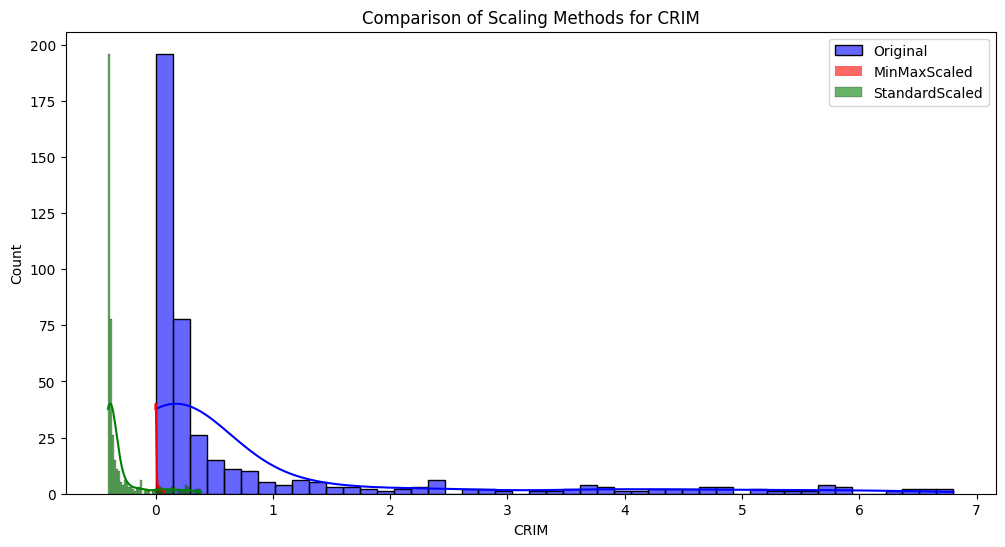

In [34]:

plt.figure(figsize=(12, 6))

sns.histplot(df["CRIM"], kde=True, label="Original", color="blue", alpha=0.6)
sns.histplot(df["CRIM_minmax"], kde=True, label="MinMaxScaled", color="red", alpha=0.6)
sns.histplot(df["CRIM_standard"], kde=True, label="StandardScaled", color="green", alpha=0.6)

plt.legend()
plt.title("Comparison of Scaling Methods for CRIM")
plt.show()

## Построение violin plot для MEDV (цены недвижимости) с разделением по CHAS (близость к реке)

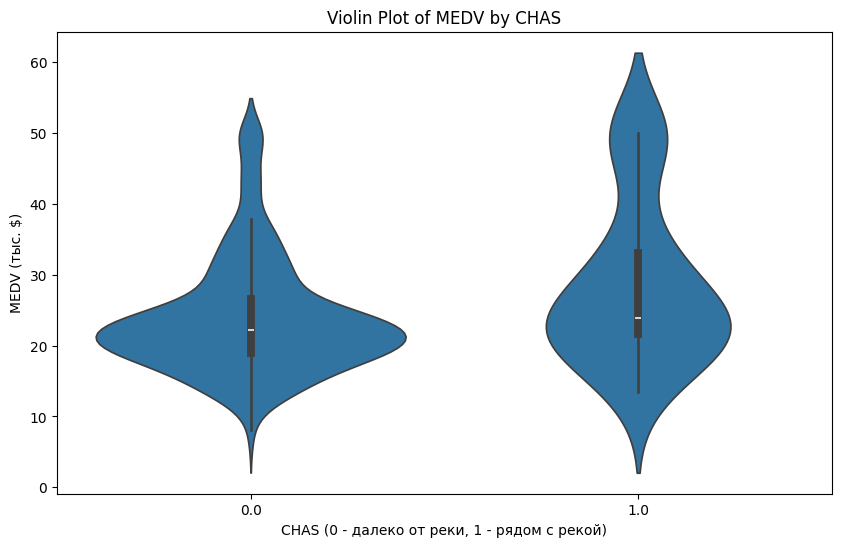

In [35]:

plt.figure(figsize=(10, 6))
sns.violinplot(x=df["CHAS"], y=df["MEDV"])
plt.title("Violin Plot of MEDV by CHAS")
plt.xlabel("CHAS (0 - далеко от реки, 1 - рядом с рекой)")
plt.ylabel("MEDV (тыс. $)")
plt.show()

In [36]:
# Вывод первых строк для проверки преобразований
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_minmax,CRIM_standard,CHAS_label_encoded,CHAS_0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.000000,-0.405592,0.0,0.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.000236,-0.403140,0.0,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000236,-0.403142,0.0,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.000293,-0.402549,0.0,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,11.43,36.2,0.000705,-0.398265,0.0,0.0
